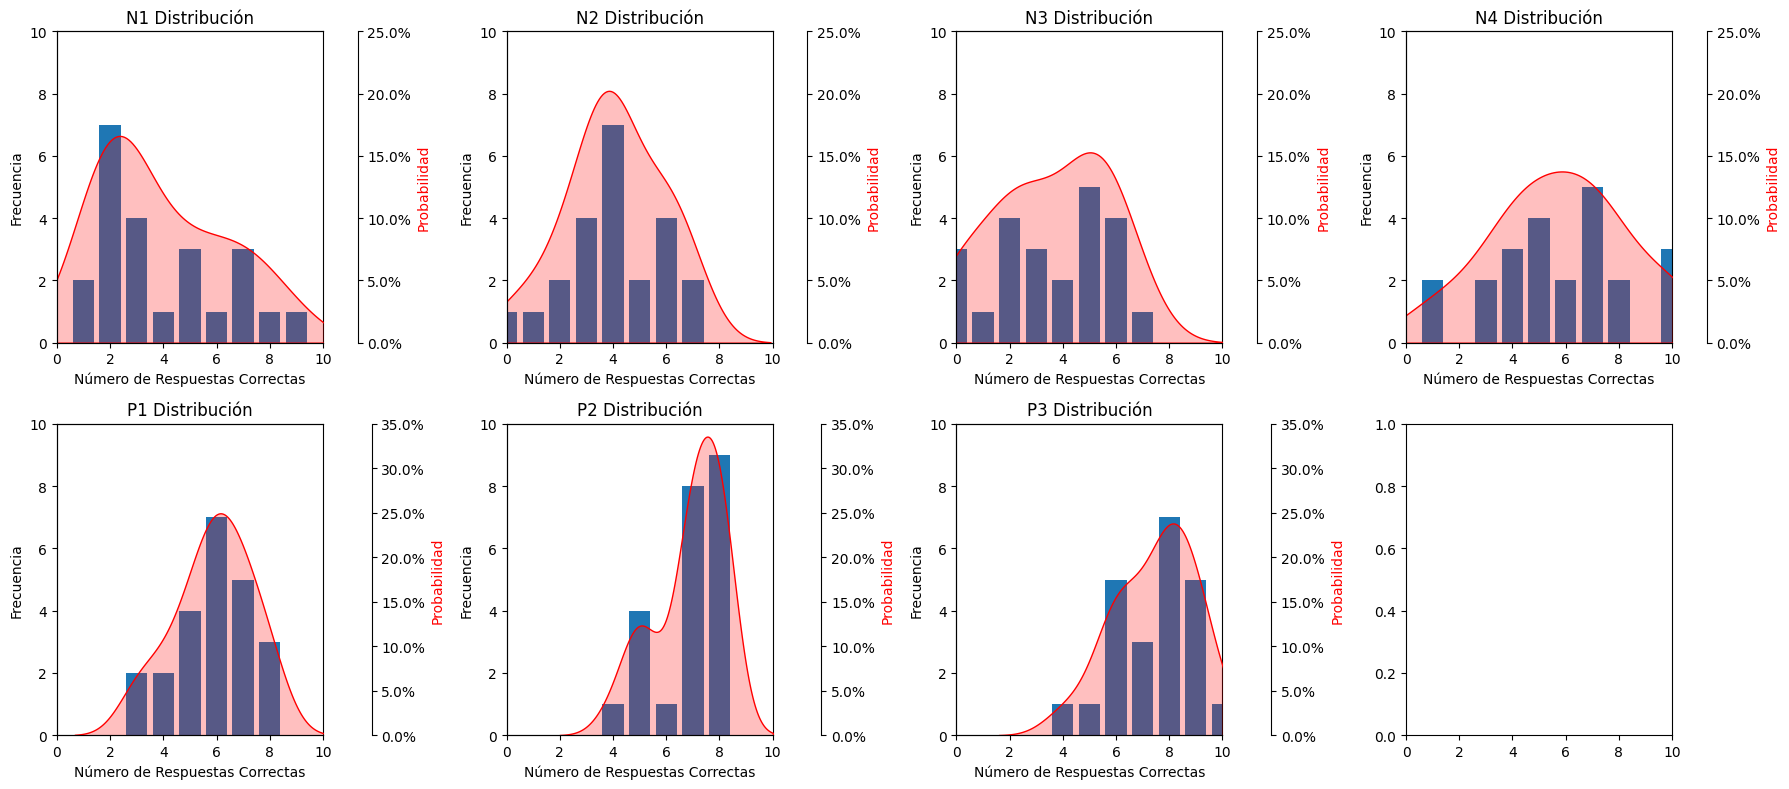

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Read the data from the CSV file (replace 'your_file.csv' with the actual file path)
data = pd.read_csv('rawdata.csv', delimiter=';')

# Create subplots to display bar plots for distribution and KDE plots for density
fig, axes = plt.subplots(2, 4, figsize=(18, 8))

# Define the maximum value for the y-axis
max_y = data[['N1', 'N2', 'N3', 'N4', 'P1', 'P2', 'P3']].max().max()

# Plot N1 to N4 distributions and density
for i, col in enumerate(['N1', 'N2', 'N3', 'N4']):
    ax = axes[0, i]
    ax.set_title(f'{col} Distribución')
    ax.set_xlabel('Número de Respuestas Correctas')
    ax.set_ylabel('Frecuencia')
    
    # Calculate the distribution
    distribution = data[col].value_counts().sort_index()
    
    # Fill in missing values with zeros and ensure the x-axis range from 0 to 10
    distribution = distribution.reindex(range(11), fill_value=0)
    
    # Plot the distribution as bars
    ax.bar(distribution.index, distribution.values)
    
    # Set the y-axis limit to the maximum value
    ax.set_ylim(0, max_y)

    # Python
    # Create a KDE plot
    ax2 = ax.twinx()
    sns.kdeplot(data[col], color='red', ax=ax2, fill=True)
    # Format y-axis labels to display as percentages
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    # Set the y-axis limit to 25%
    ax2.set_ylim(0, 0.25)
    ax2.spines['right'].set_position(('outward', 25))
    ax2.set_ylabel('Probabilidad', color='red')

# Plot P1 to P3 distributions and density
for i, col in enumerate(['P1', 'P2', 'P3']):
    ax = axes[1, i]
    ax.set_title(f'{col} Distribución')
    ax.set_xlabel('Número de Respuestas Correctas')
    ax.set_ylabel('Frecuencia')
    
    # Calculate the distribution
    distribution = data[col].value_counts().sort_index()
    
    # Fill in missing values with zeros and ensure the x-axis range from 0 to 10
    distribution = distribution.reindex(range(11), fill_value=0)
    
    # Plot the distribution as bars
    ax.bar(distribution.index, distribution.values)
    
    # Set the y-axis limit to the maximum value
    ax.set_ylim(0, max_y)
    
    # Python
    # Create a KDE plot
    ax2 = ax.twinx()
    sns.kdeplot(data[col], color='red', ax=ax2, fill=True)
    # Format y-axis labels to display as percentages
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    # Set the y-axis limit to 35%
    ax2.set_ylim(0, 0.35)
    ax2.spines['right'].set_position(('outward', 35))
    ax2.set_ylabel('Probabilidad', color='red')

# Set the x-axis limits to ensure it always displays 0 to 10
for ax in axes.flat:
    ax.set_xlim(0, 10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
